<a href="https://colab.research.google.com/github/erinmcmahon26/School_EDA/blob/main/Housing_Prices_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingest Data

In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/erinmcmahon26/School_EDA/main/housing_prices_train_data.csv')

In [ ]:
df_test = pd.read_csv('https://raw.githubusercontent.com/erinmcmahon26/School_EDA/main/housing_prices_test.csv')

In [ ]:
df_train.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## EDA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from scipy.stats import f_oneway
import sklearn

In [ ]:
pd.set_option("display.max_rows", None)

In [ ]:
df_train.describe()

Id   MSSubClass  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean    730.500000    56.897260  ...  2007.815753  180921.195890
std     421.610009    42.300571  ...     1.328095   79442.502883
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     365.750000    20.000000  ...  2007.000000  129975.000000
50%     730.500000    50.000000  ...  2008.000000  163000.000000
75%    1095.250000    70.000000  ...  2009.000000  214000.000000
max    1460.000000   190.000000  ...  2010.000000  755000.000000

[8 rows x 38 columns]

In [ ]:
df_train.describe(include = "O")

MSZoning Street Alley LotShape  ...  Fence MiscFeature SaleType SaleCondition
count      1460   1460    91     1460  ...    281          54     1460          1460
unique        5      2     2        4  ...      4           4        9             6
top          RL   Pave  Grvl      Reg  ...  MnPrv        Shed       WD        Normal
freq       1151   1454    50      925  ...    157          49     1267          1198

[4 rows x 43 columns]

In [ ]:
df_train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
df_test.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
df_train.fillna(0, inplace=True)

In [ ]:
df_test.fillna(0, inplace=True)

### Assessing Dependent Variable

In [ ]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice'>

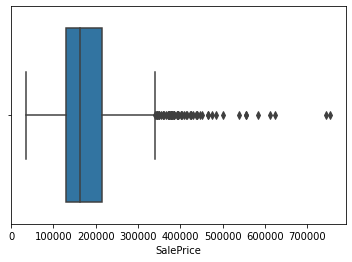

In [ ]:
sns.boxplot(x='SalePrice', data=df_train)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

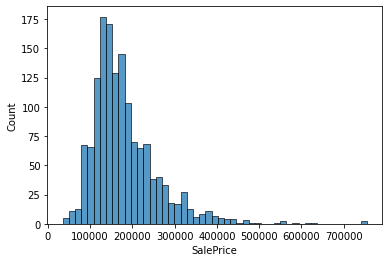

In [ ]:
sns.histplot(x='SalePrice', data = df_train)

### Outlier Removal

In [ ]:
# took out outliers based on boxplot outlier indications
outliers = df_train[df_train['SalePrice'] > 350000]
len(outliers)

54

In [ ]:
# created new df excluding outliers
df_train2 = df_train[df_train['SalePrice'] <= 350000]

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

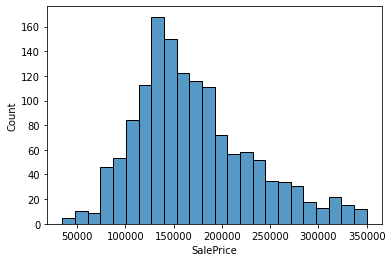

In [ ]:
sns.histplot(x='SalePrice', data = df_train2)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

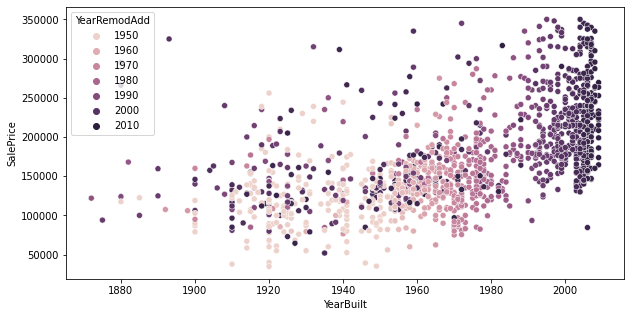

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='YearBuilt', y='SalePrice', hue='YearRemodAdd', data= df_train2)

### Search For Features

In [ ]:
# combine like features 
df_train2['TotalBath'] = df_train2['BsmtFullBath'] + 0.5*(df_train2['BsmtHalfBath']) +df_train2['FullBath'] + 0.5*(df_train2['HalfBath'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# combine like features for test
df_test['TotalBath'] = df_test['BsmtFullBath'] + 0.5*(df_test['BsmtHalfBath']) + df_test['FullBath'] + 0.5*(df_test['HalfBath'])

In [ ]:
corr_matrix = df_train2.corr()
corr_matrix['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.786782
GrLivArea        0.668598
TotalBath        0.640550
GarageCars       0.633250
GarageArea       0.613226
FullBath         0.581281
YearBuilt        0.563842
TotalBsmtSF      0.546806
YearRemodAdd     0.539863
1stFlrSF         0.525214
TotRmsAbvGrd     0.481137
Fireplaces       0.455876
MasVnrArea       0.364205
2ndFlrSF         0.326451
OpenPorchSF      0.325439
WoodDeckSF       0.306803
BsmtFinSF1       0.303796
GarageYrBlt      0.302382
HalfBath         0.285982
LotArea          0.246926
BsmtUnfSF        0.213847
BsmtFullBath     0.209889
BedroomAbvGr     0.206744
LotFrontage      0.142587
ScreenPorch      0.102655
MoSold           0.074079
PoolArea         0.046710
3SsnPorch        0.040766
BsmtFinSF2       0.002779
MiscVal         -0.013894
Id              -0.016095
BsmtHalfBath    -0.021942
YrSold          -0.031760
OverallCond     -0.049012
LowQualFinSF    -0.058591
MSSubClass      -0.058979
EnclosedPorch   -0.139592
KitchenAbvGr

Text(0.5, 1.0, 'Correlation Housing Prices Features')

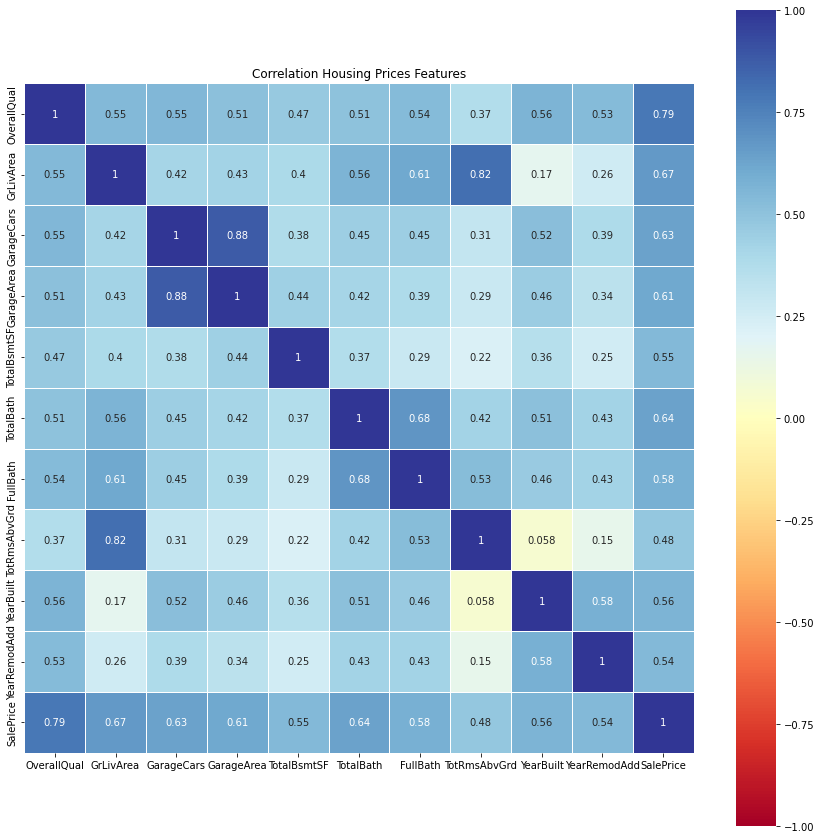

In [ ]:
# pull out top 10 most correlated quantitative variables
columns = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','TotalBath','FullBath',
           'TotRmsAbvGrd','YearBuilt','YearRemodAdd', 'SalePrice']
df_train2_corr = df_train2[columns]
df_train2_corr.corr()

corrmat = df_train2_corr.corr()

f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corrmat, vmin = -1, vmax = 1, square=True, annot = True, cmap = 'RdYlBu', linewidths =.5)
plt.title('Correlation Housing Prices Features')

This plot shows all features that are highly correlated to Sale Price. There appears to be a decent amount of collinearity going on. I would like to further assess this:

In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df2_num.values, i) for i in range(df2_num.shape[1])]
vif['variable'] = df2_num.columns
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF       variable
0     1.026821             Id
1     1.548353     MSSubClass
2     1.176078    LotFrontage
3     1.249805        LotArea
4     2.948005    OverallQual
5     1.583664    OverallCond
6     3.997553      YearBuilt
7     2.222461   YearRemodAdd
8     1.281771     MasVnrArea
9          inf     BsmtFinSF1
10         inf     BsmtFinSF2
11         inf      BsmtUnfSF
12         inf    TotalBsmtSF
13         inf       1stFlrSF
14         inf       2ndFlrSF
15         inf   LowQualFinSF
16         inf      GrLivArea
17   66.369557   BsmtFullBath
18    3.503465   BsmtHalfBath
19  423.475267       FullBath
20   17.717959       HalfBath
21    2.336208   BedroomAbvGr
22    1.633779   KitchenAbvGr
23    4.846874   TotRmsAbvGrd
24    1.539878     Fireplaces
25    1.850723    GarageYrBlt
26    5.776918     GarageCars
27    5.125012     GarageArea
28    1.194426     WoodDeckSF
29    1.215714    OpenPorchSF
30    1.294987  EnclosedPorch
31    1.024117      3SsnPorch
32    1.111170    ScreenPorch
33    1.083228       PoolArea
34    1.030217        MiscVal
35    1.051961         MoSold
36    1.054113         YrSold
37  286.916403      TotalBath

These values are showing which columns have x amount of collinearity to other columns in the numerical columns. If the numbers are close to 1 none-low, 1-5 moderate, and above 5 is high collinearity. 

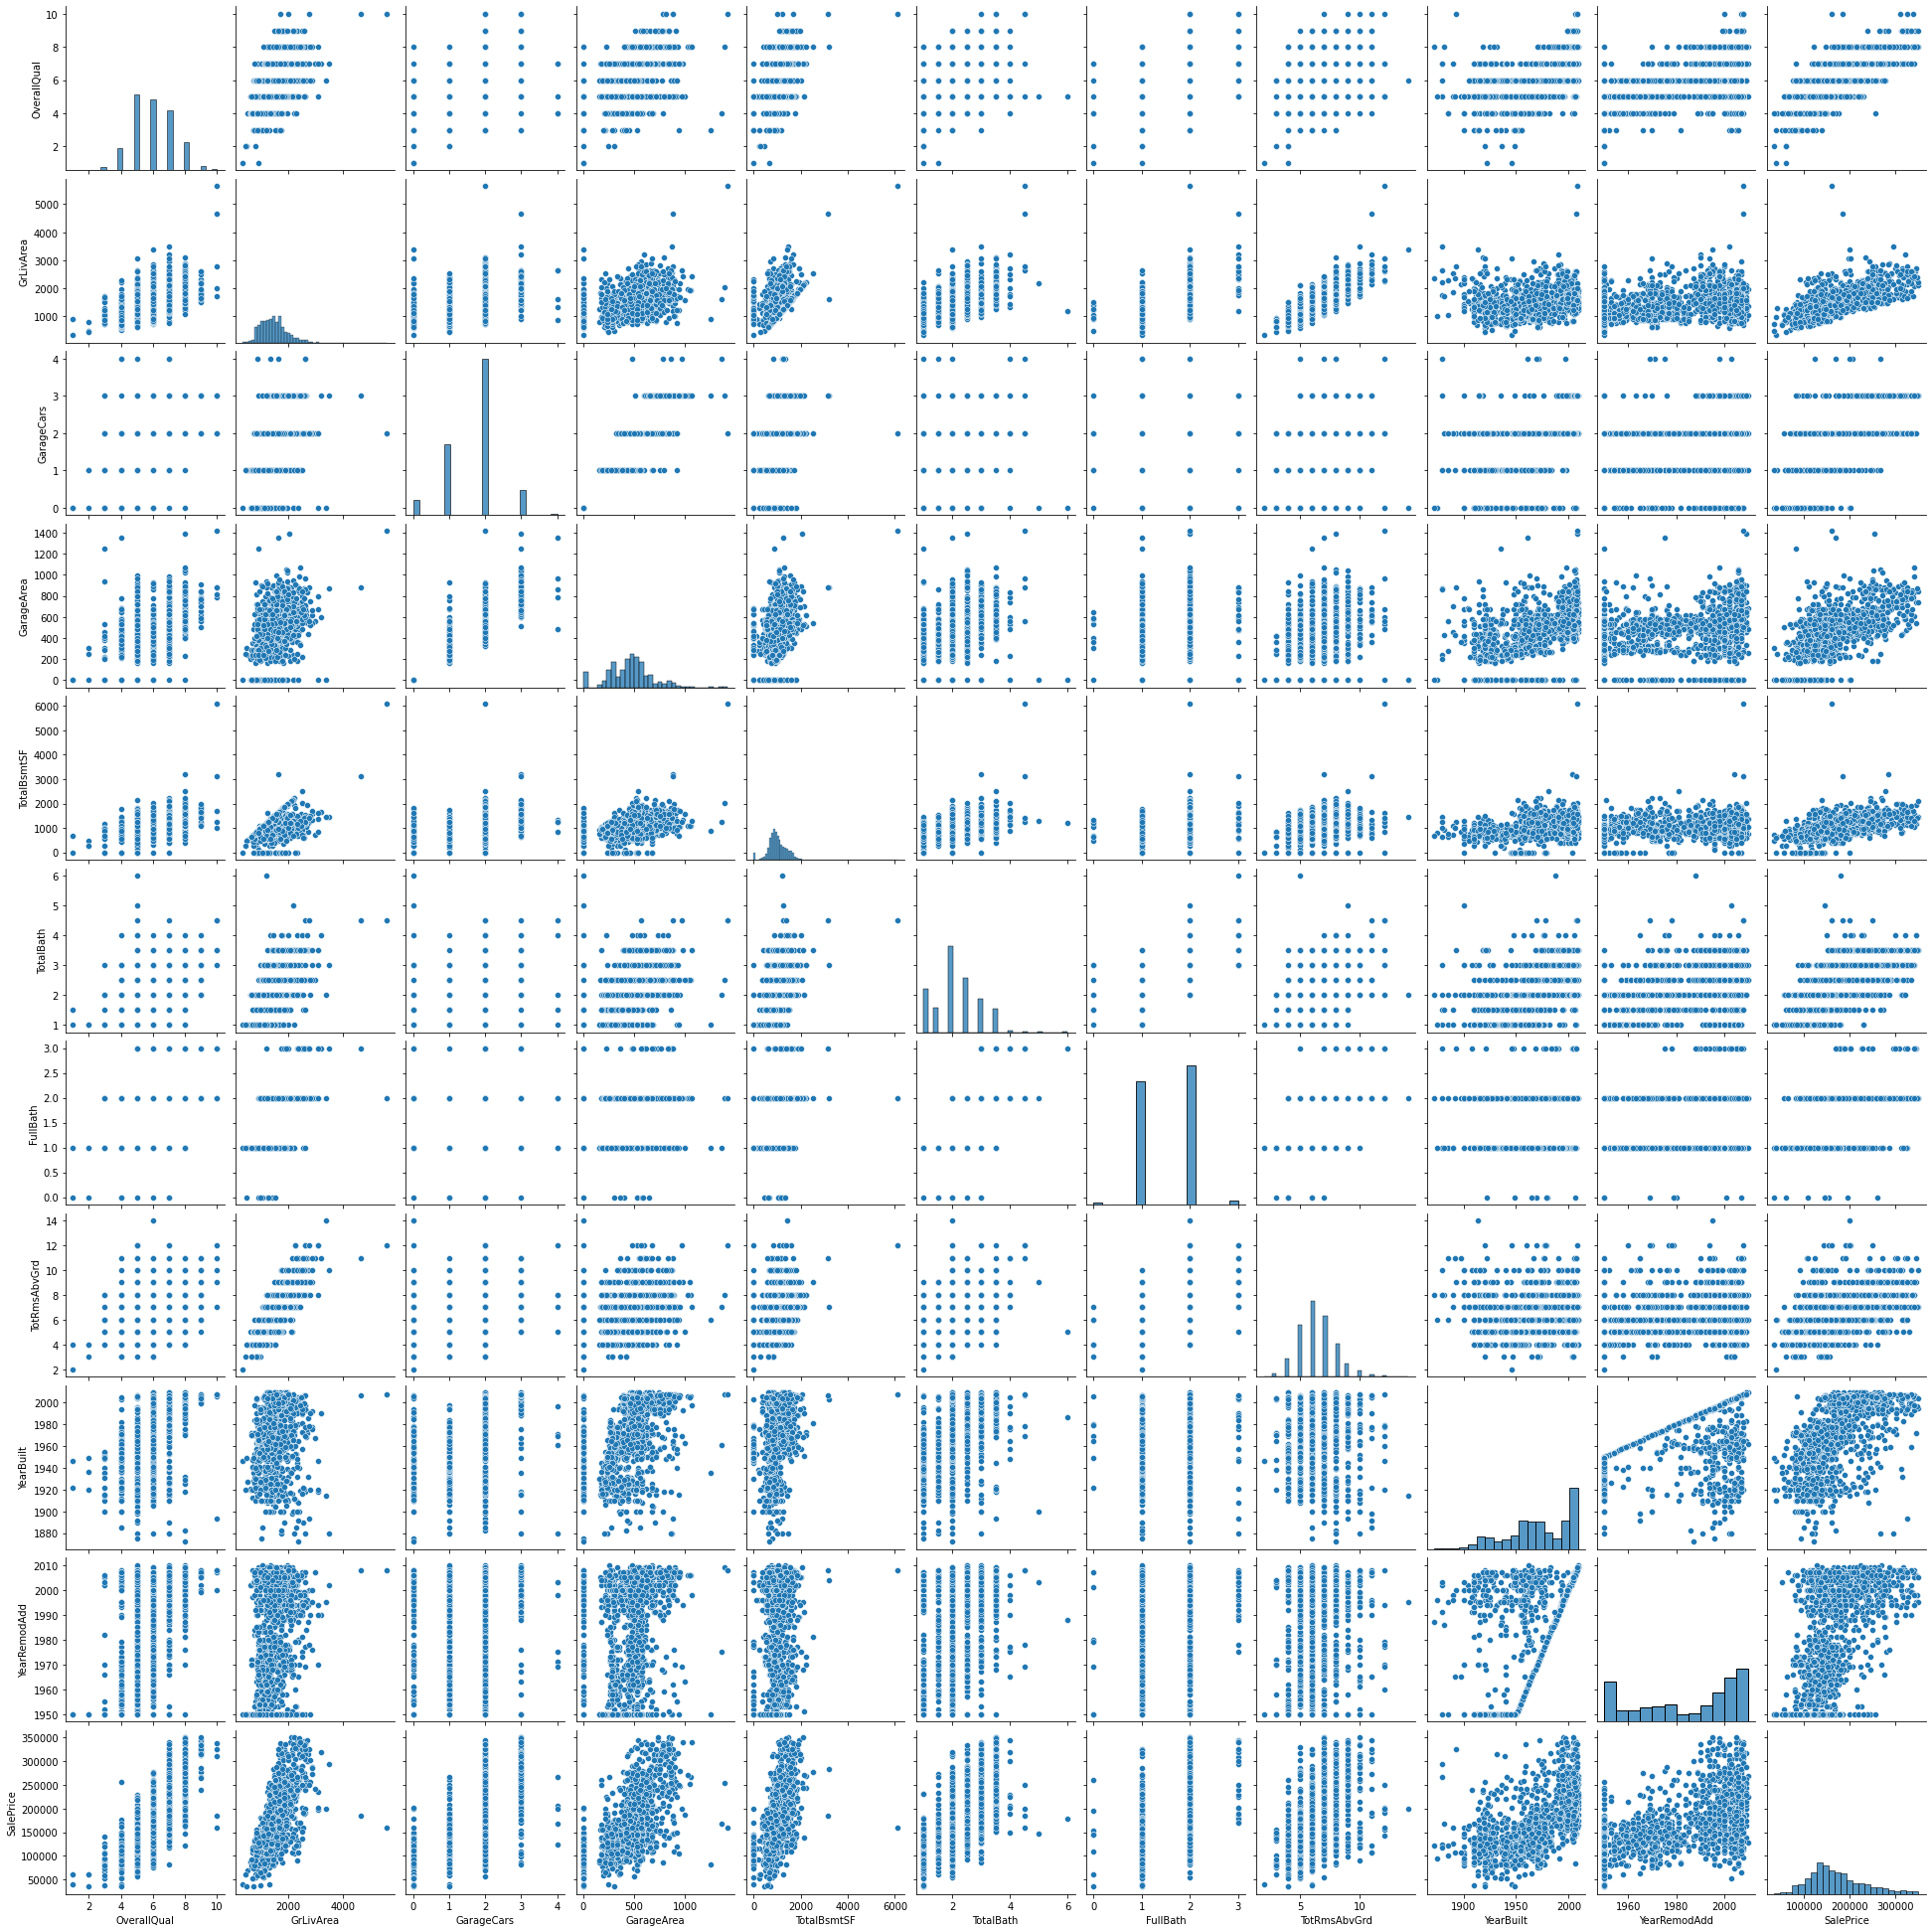

In [ ]:
sns.pairplot(df_train2_corr)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

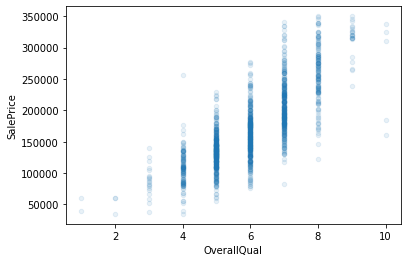

In [ ]:
df_train2.plot(kind='scatter', x= 'OverallQual', y = 'SalePrice', alpha = 0.1)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

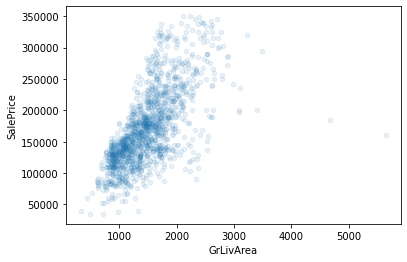

In [ ]:
df_train2.plot(kind='scatter', x= 'GrLivArea', y = 'SalePrice', alpha = 0.1)

<AxesSubplot:xlabel='TotalBath', ylabel='SalePrice'>

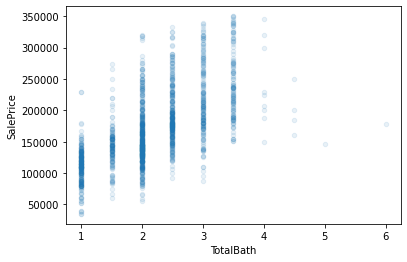

In [ ]:
df_train2.plot(kind='scatter', x= 'TotalBath', y = 'SalePrice', alpha = 0.1)

In [ ]:
df_train2[['SalePrice','OverallQual']].groupby('OverallQual').describe()

SalePrice                 ...                    
                count           mean  ...       75%       max
OverallQual                           ...                    
1                 2.0   50150.000000  ...   55575.0   61000.0
2                 3.0   51770.333333  ...   60000.0   60000.0
3                20.0   87473.750000  ...   97500.0  139600.0
4               116.0  108420.655172  ...  125500.0  256000.0
5               397.0  133523.347607  ...  147000.0  228950.0
6               374.0  161603.034759  ...  181000.0  277000.0
7               317.0  206632.709779  ...  230000.0  341000.0
8               149.0  258656.120805  ...  287090.0  350000.0
9                23.0  312765.956522  ...  327450.0  350000.0
10                5.0  263450.000000  ...  325000.0  337500.0

[10 rows x 8 columns]

In [ ]:
df_train2[['SalePrice','TotalBath']].groupby('TotalBath').describe()

SalePrice                               ...                              
              count           mean           std  ...       50%       75%       max
TotalBath                                         ...                              
1.0           228.0  110869.671053  28375.647150  ...  112250.0  127500.0  230000.0
1.5           129.0  142692.372093  35599.840436  ...  142500.0  158000.0  274000.0
2.0           453.0  156603.075055  45812.050131  ...  145000.0  178000.0  320000.0
2.5           285.0  192929.936842  46335.213950  ...  181000.0  221000.0  333168.0
3.0           174.0  218264.902299  57631.885507  ...  209450.0  261600.0  340000.0
3.5           122.0  243525.745902  55015.915858  ...  235000.0  277750.0  350000.0
4.0             9.0  240408.222222  65989.395045  ...  225000.0  299800.0  345000.0
4.5             4.0  198687.500000  37972.234922  ...  192375.0  212500.0  250000.0
5.0             1.0  145900.000000           NaN  ...  145900.0  145900.0  145900.0
6.0             1.0  179000.000000           NaN  ...  179000.0  179000.0  179000.0

[10 rows x 8 columns]

<AxesSubplot:xlabel='TotalBath', ylabel='SalePrice'>

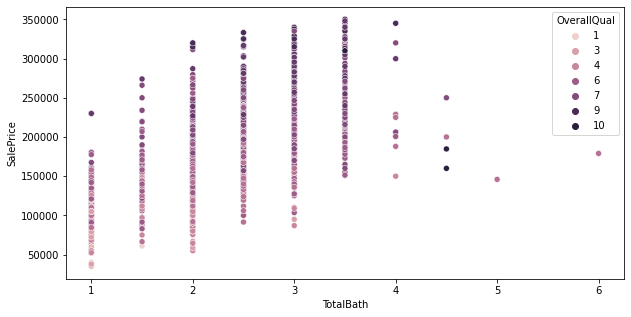

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='TotalBath', y='SalePrice', hue='OverallQual', data=df_train2)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

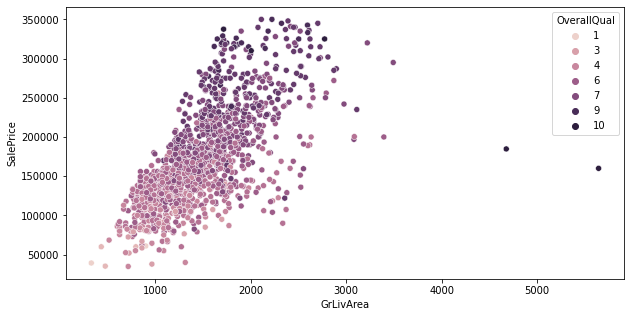

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='OverallQual', data=df_train2)

In [ ]:
# making df with just the quantitative variables I want to use for my model
#df2_new2_num[['YearBuilt', 'YearRemodAdd', 'GrLivArea', 'MasVnrArea', 'FullBath', 'GarageCars']]
df_train_features = df_train2[['YearBuilt', 'YearRemodAdd', 'GrLivArea', 'MasVnrArea', 'FullBath', 'GarageCars']]

In [ ]:
df_test_features = df_test[['YearBuilt', 'YearRemodAdd', 'GrLivArea', 'MasVnrArea', 'FullBath', 'GarageCars']]

### Feature Scaling

In [ ]:
# Min Max Scaling
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# use dataframe with numerical 
#df_num_cols = ['OverallQual', 'GrLivArea', 'TotalBath']
df_train_features[['YearBuilt', 'YearRemodAdd', 'GrLivArea', 'MasVnrArea', 'FullBath', 'GarageCars']] = scaler.fit_transform(
    df_train_features[['YearBuilt', 'YearRemodAdd', 'GrLivArea', 'MasVnrArea', 'FullBath', 'GarageCars']])
df_train_features.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


YearBuilt  YearRemodAdd  GrLivArea  MasVnrArea  FullBath  GarageCars
0   0.956204      0.883333   0.259231     0.12250  0.666667        0.50
1   0.759124      0.433333   0.174830     0.00000  0.666667        0.50
2   0.941606      0.866667   0.273549     0.10125  0.666667        0.50
3   0.313869      0.333333   0.260550     0.00000  0.333333        0.75
4   0.934307      0.833333   0.351168     0.21875  0.666667        0.75

In [ ]:
df_test_features[['YearBuilt', 'YearRemodAdd', 'GrLivArea', 'MasVnrArea', 'FullBath', 'GarageCars']] = scaler.fit_transform(
    df_test_features[['YearBuilt', 'YearRemodAdd', 'GrLivArea', 'MasVnrArea', 'FullBath', 'GarageCars']])
df_test_features.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


YearBuilt  YearRemodAdd  GrLivArea  MasVnrArea  FullBath  GarageCars
0   0.625954      0.183333   0.104309    0.000000      0.25         0.2
1   0.603053      0.133333   0.196672    0.083721      0.25         0.2
2   0.900763      0.800000   0.260666    0.000000      0.50         0.4
3   0.908397      0.800000   0.255333    0.015504      0.50         0.4
4   0.862595      0.700000   0.186220    0.000000      0.50         0.4

#### Assess Categorical Variables

In [ ]:
df_train2_cat = df_train2.select_dtypes(include='object')

In [ ]:
# still can't figure out why I get this warning even when using .loc
df_train2_cat['SalePrice'] = df_train2.loc[:,'SalePrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_train2_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1406 non-null   object
 1   Street         1406 non-null   object
 2   Alley          1406 non-null   object
 3   LotShape       1406 non-null   object
 4   LandContour    1406 non-null   object
 5   Utilities      1406 non-null   object
 6   LotConfig      1406 non-null   object
 7   LandSlope      1406 non-null   object
 8   Neighborhood   1406 non-null   object
 9   Condition1     1406 non-null   object
 10  Condition2     1406 non-null   object
 11  BldgType       1406 non-null   object
 12  HouseStyle     1406 non-null   object
 13  RoofStyle      1406 non-null   object
 14  RoofMatl       1406 non-null   object
 15  Exterior1st    1406 non-null   object
 16  Exterior2nd    1406 non-null   object
 17  MasVnrType     1406 non-null   object
 18  ExterQual      1406 non-null

In [ ]:
#pip install dython - installed 

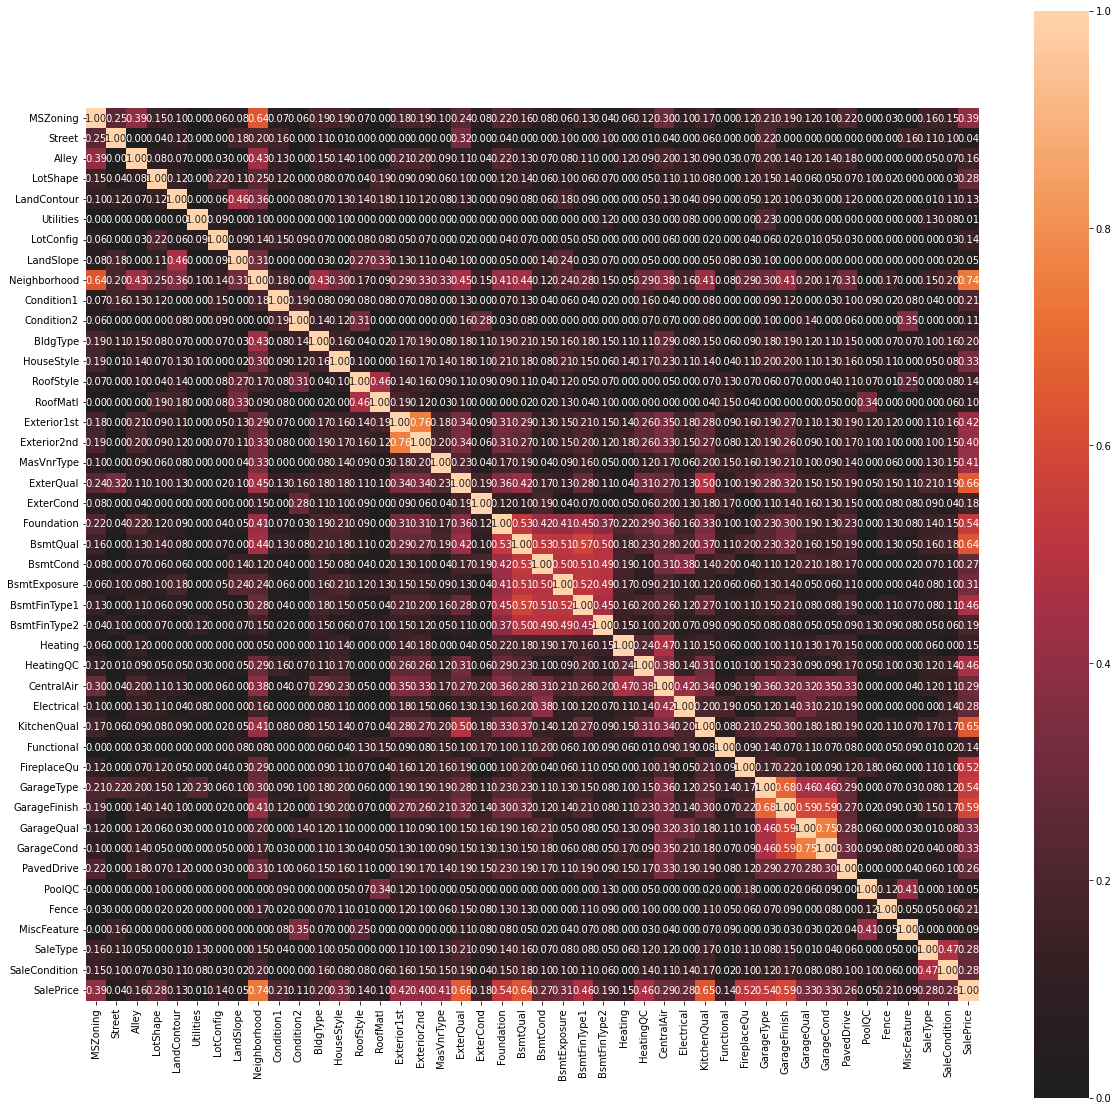

{'ax': <AxesSubplot:>,
 'corr':                MSZoning    Street     Alley  ...  SaleType  SaleCondition  SalePrice
 MSZoning       1.000000  0.249014  0.390464  ...  0.159376       0.145614   0.393303
 Street         0.249014  1.000000  0.000000  ...  0.109514       0.104600   0.044395
 Alley          0.390464  0.000000  1.000000  ...  0.049342       0.069369   0.156227
 LotShape       0.154713  0.041146  0.079783  ...  0.000000       0.027188   0.278998
 LandContour    0.103926  0.117259  0.069888  ...  0.011514       0.107909   0.130651
 Utilities      0.000000  0.000000  0.000000  ...  0.129918       0.075768   0.014860
 LotConfig      0.062523  0.000000  0.034462  ...  0.000000       0.034506   0.137562
 LandSlope      0.075151  0.182923  0.000000  ...  0.000000       0.024160   0.049486
 Neighborhood   0.641332  0.200445  0.430315  ...  0.154885       0.199718   0.736285
 Condition1     0.065694  0.164246  0.127453  ...  0.037595       0.000000   0.212151
 Condition2     0.05684

In [ ]:
from dython.nominal import associations
associations(df_train2_cat, figsize=(20,20))

Showing correlation between only categorical variables. 

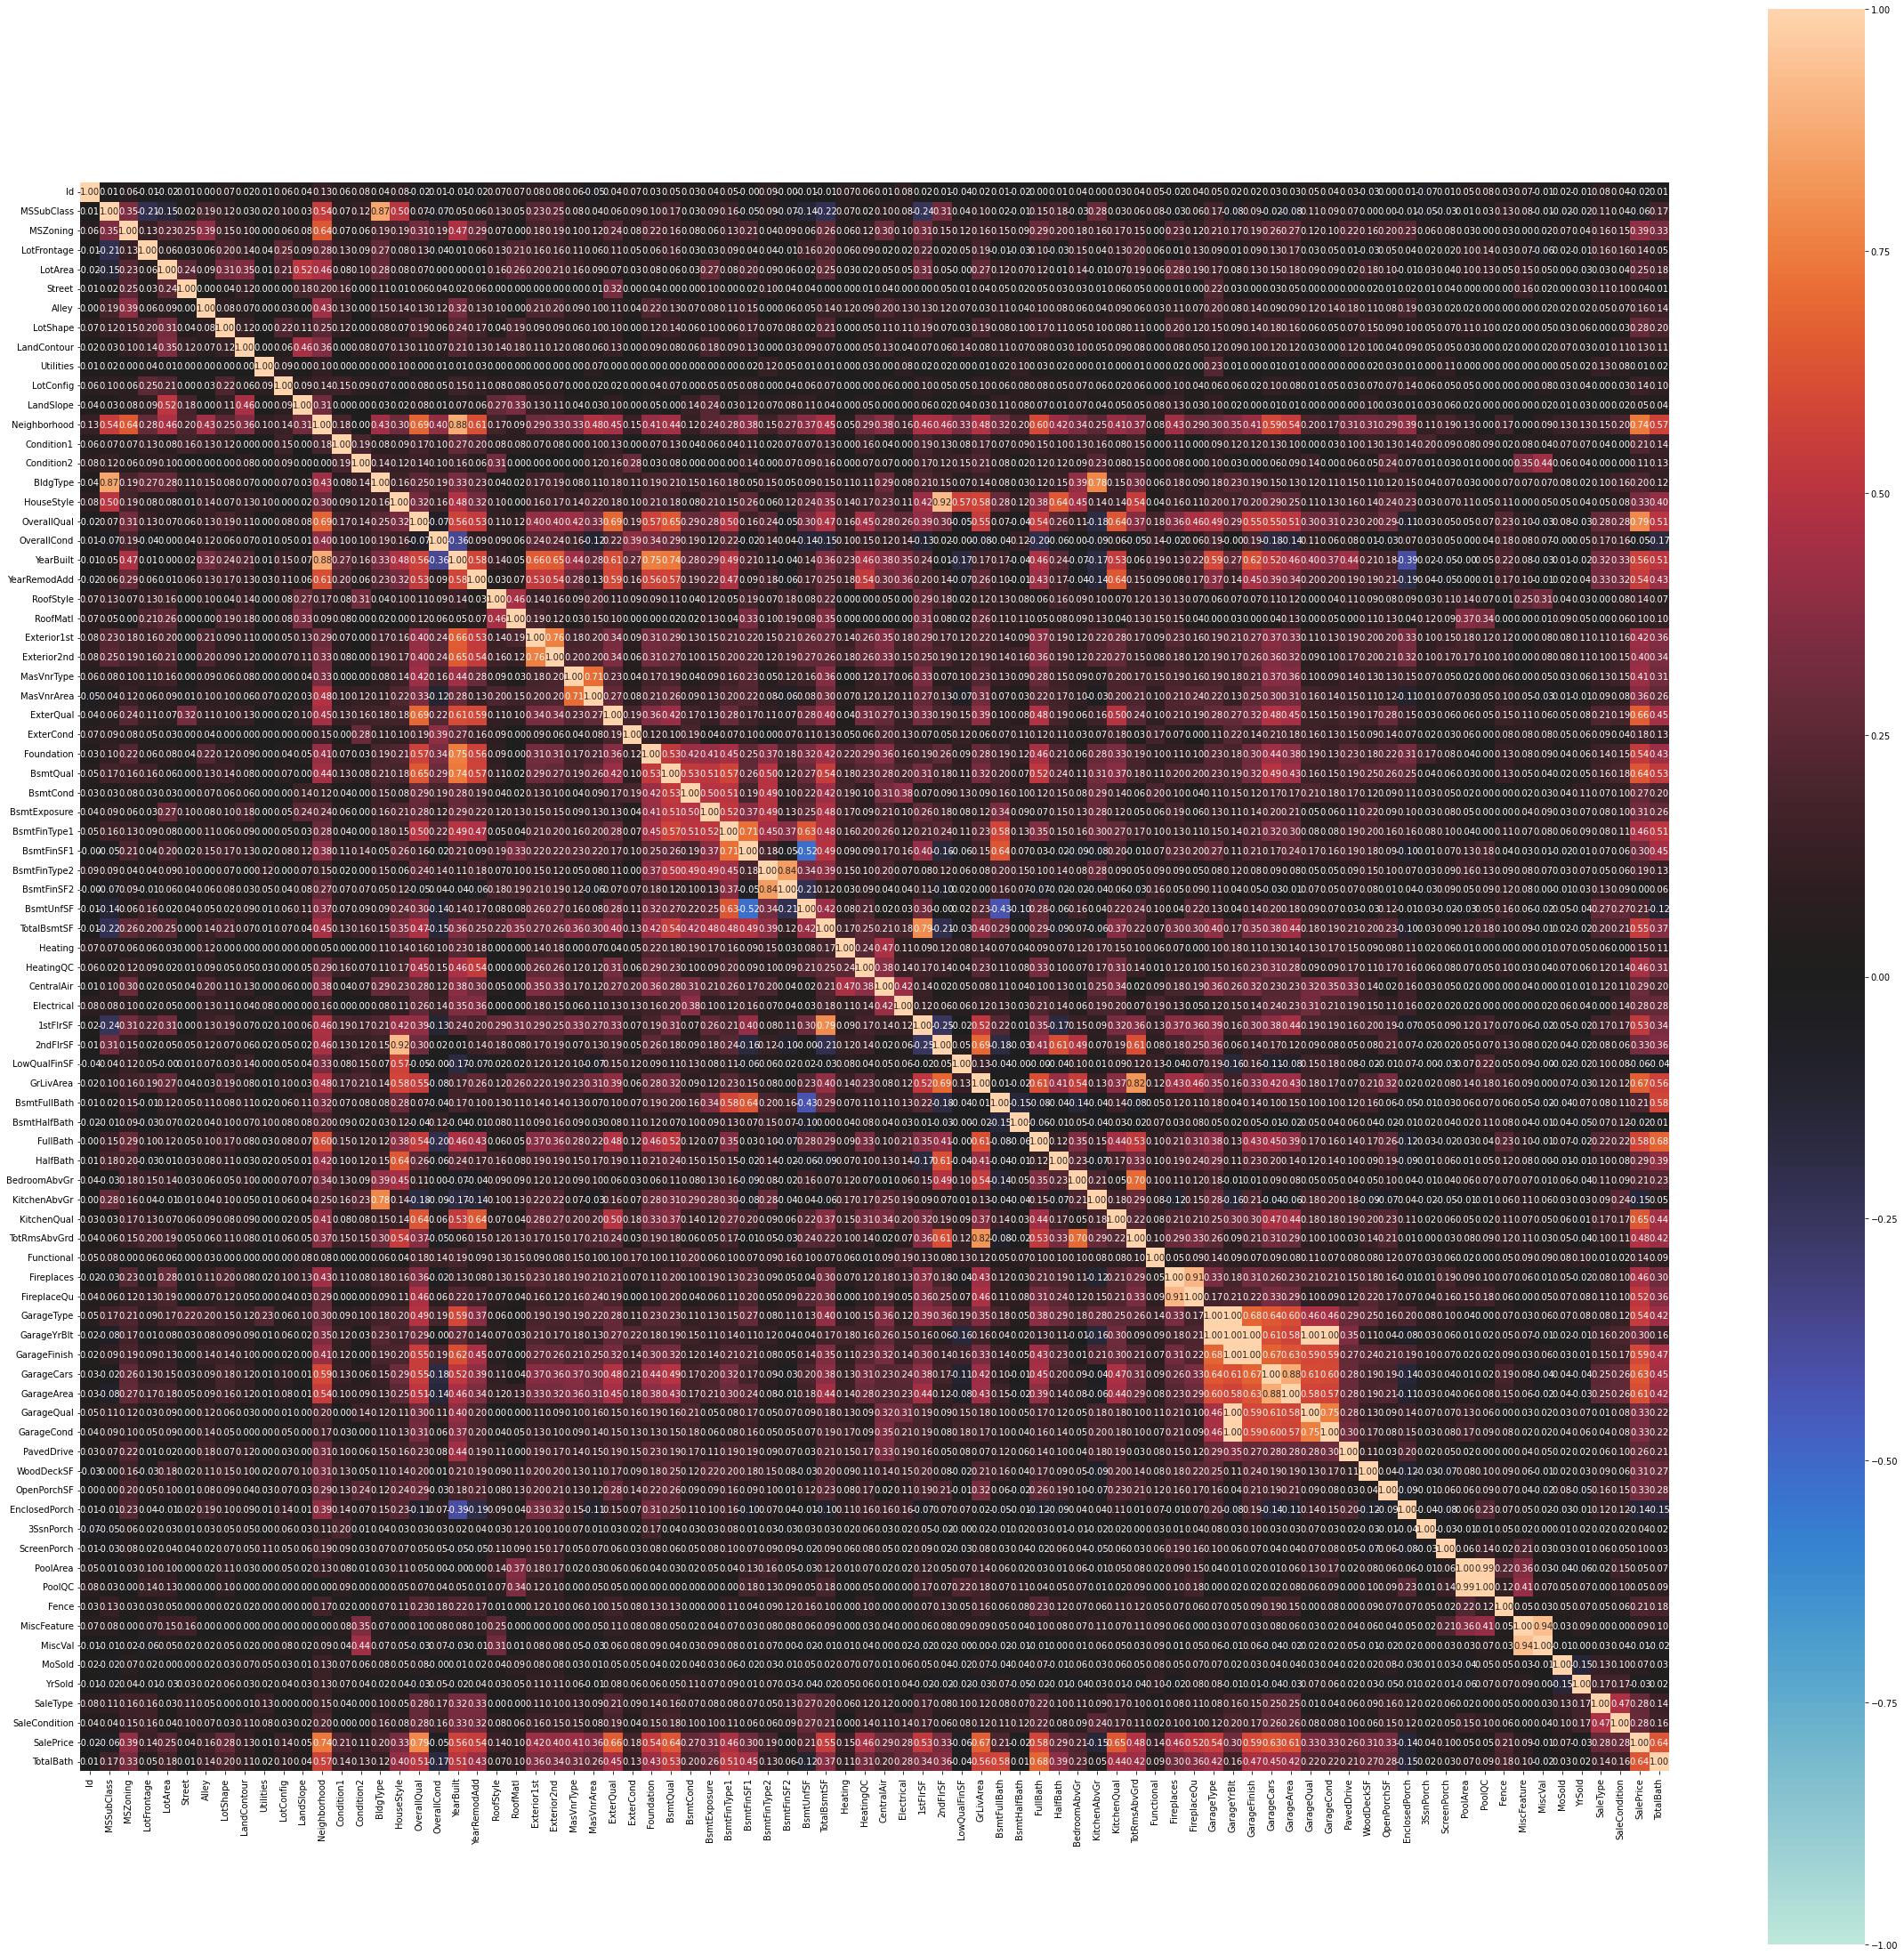

In [ ]:
association = associations(df_train2, figsize=(40,40))

Showing correlation between all variables in the dataset.

In [ ]:
df_train2_cat.head()

MSZoning Street Alley LotShape  ... MiscFeature SaleType SaleCondition SalePrice
0       RL   Pave     0      Reg  ...           0       WD        Normal    208500
1       RL   Pave     0      Reg  ...           0       WD        Normal    181500
2       RL   Pave     0      IR1  ...           0       WD        Normal    223500
3       RL   Pave     0      IR1  ...           0       WD       Abnorml    140000
4       RL   Pave     0      IR1  ...           0       WD        Normal    250000

[5 rows x 44 columns]

In [ ]:
for x in df_train2_cat.columns:
  print(x, ':', len(df_train2_cat[x].unique()))

MSZoning : 5
Street : 2
Alley : 3
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 5
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 5
BsmtCond : 5
BsmtExposure : 5
BsmtFinType1 : 7
BsmtFinType2 : 7
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 6
KitchenQual : 4
Functional : 7
FireplaceQu : 6
GarageType : 7
GarageFinish : 4
GarageQual : 6
GarageCond : 6
PavedDrive : 3
PoolQC : 4
Fence : 5
MiscFeature : 5
SaleType : 9
SaleCondition : 6
SalePrice : 610


In [ ]:
# need drop_first to run in model
train_dum_df = pd.get_dummies(df_train2_cat[['BsmtQual','FireplaceQu','KitchenQual','Foundation','GarageType']], drop_first=True)

In [ ]:
train_dum_df.head()

BsmtQual_Ex  BsmtQual_Fa  ...  GarageType_CarPort  GarageType_Detchd
0            0            0  ...                   0                  0
1            0            0  ...                   0                  0
2            0            0  ...                   0                  0
3            0            0  ...                   0                  1
4            0            0  ...                   0                  0

[5 rows x 23 columns]

In [ ]:
#combine quantitative variables with qualitative variables
df_train_features= pd.concat([df_train_features, train_dum_df], axis = 1)

In [ ]:
df_train_features.head()

YearBuilt  YearRemodAdd  ...  GarageType_CarPort  GarageType_Detchd
0   0.956204      0.883333  ...                   0                  0
1   0.759124      0.433333  ...                   0                  0
2   0.941606      0.866667  ...                   0                  0
3   0.313869      0.333333  ...                   0                  1
4   0.934307      0.833333  ...                   0                  0

[5 rows x 29 columns]

In [ ]:
df_test_cat = df_test.select_dtypes(include='object')

In [ ]:
df_test_cat['KitchenQual'].unique()

array(['TA', 'Gd', 'Ex', 'Fa', 0], dtype=object)

In [ ]:
df_test_cat['KitchenQual'] = df_test_cat['KitchenQual'].replace([0],'TA')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_test_cat['KitchenQual'].unique()

array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object)

In [ ]:
test_dum_df = pd.get_dummies(df_test_cat[['BsmtQual','FireplaceQu','KitchenQual','Foundation','GarageType']], drop_first=True)

In [ ]:
test_dum_df.head()

BsmtQual_Ex  BsmtQual_Fa  ...  GarageType_CarPort  GarageType_Detchd
0            0            0  ...                   0                  0
1            0            0  ...                   0                  0
2            0            0  ...                   0                  0
3            0            0  ...                   0                  0
4            0            0  ...                   0                  0

[5 rows x 23 columns]

In [ ]:
df_test_features= pd.concat([df_test_features, test_dum_df], axis = 1)

In [ ]:
df_test_features.head()

YearBuilt  YearRemodAdd  ...  GarageType_CarPort  GarageType_Detchd
0   0.625954      0.183333  ...                   0                  0
1   0.603053      0.133333  ...                   0                  0
2   0.900763      0.800000  ...                   0                  0
3   0.908397      0.800000  ...                   0                  0
4   0.862595      0.700000  ...                   0                  0

[5 rows x 29 columns]

## Modeling

### Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

y = df_train2['SalePrice']
x = df_train2[['OverallQual']]

lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

In [ ]:
# another way to do this model 
#import statsmodels.api as sm

#y = df_train2['SalePrice']
#x = df_train2[['OverallQual']]
#x = sm.add_constant(x)

#lm = sm.OLS(y,x).fit()
#lm.summary()

In [ ]:
y_pred = 36810 * x['OverallQual'] - 49560

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

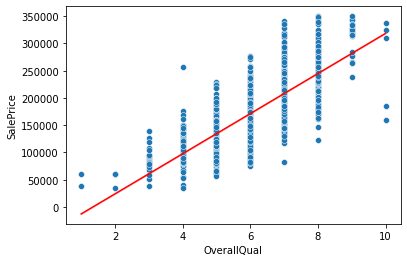

In [ ]:
sns.scatterplot(x=x['OverallQual'], y=y)
sns.lineplot(x=x['OverallQual'], y=y_pred, color='red')

### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

y = df_train2['SalePrice']
x = df_train2[['OverallQual']]

poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x)

p = linear_model.LinearRegression()
p.fit(x_poly, y)
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(55122.73911879197, array([   0.        ,  442.22444124, 3014.00206132]))

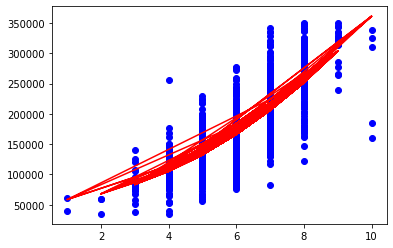

In [ ]:
plt.scatter(x, y, color = 'blue')
plt.plot(x, p.predict(x_poly), color='red')

### Piecewise 

In [ ]:
pip install pwlf

In [ ]:
import pwlf

PWLF = pwlf.PiecewiseLinFit(df_train2['SalePrice'], df_train2['OverallQual'])

z = PWLF.fit(3)
slopes = PWLF.calc_slopes()

xHat = df_train2['SalePrice']  
yHat = PWLF.predict(xHat)

p = PWLF.p_values(method='non-linear', step_size=1e-4)
se = PWLF.se

In [ ]:
print(p)
print(se)

[2.70131439e-120 1.66972290e-026 8.93618040e-002 1.18689113e-004
 3.33525092e-017 1.66659074e-089]
[1.35561343e-01 1.67718964e-06 3.24521522e-06 2.89784830e-06
 1.62833185e+04 8.52425603e+03]


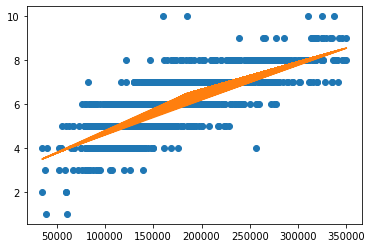

In [ ]:
plt.figure()
plt.plot(df_train2['SalePrice'], df_train2['OverallQual'], 'o')
plt.plot(xHat, yHat, '-')
plt.show()

### Multiple Linear Regression Model

In [ ]:
df_train_features.isna().sum()

YearBuilt             0
YearRemodAdd          0
GrLivArea             0
MasVnrArea            0
FullBath              0
GarageCars            0
BsmtQual_Ex           0
BsmtQual_Fa           0
BsmtQual_Gd           0
BsmtQual_TA           0
FireplaceQu_Ex        0
FireplaceQu_Fa        0
FireplaceQu_Gd        0
FireplaceQu_Po        0
FireplaceQu_TA        0
KitchenQual_Fa        0
KitchenQual_Gd        0
KitchenQual_TA        0
Foundation_CBlock     0
Foundation_PConc      0
Foundation_Slab       0
Foundation_Stone      0
Foundation_Wood       0
GarageType_2Types     0
GarageType_Attchd     0
GarageType_Basment    0
GarageType_BuiltIn    0
GarageType_CarPort    0
GarageType_Detchd     0
dtype: int64

In [ ]:
y = df_train2['SalePrice']
x2 = df_train_features

lin_reg = LinearRegression()
mul_lin_reg = lin_reg.fit(x2, y)

In [ ]:
# look at summary statistics

#mul_lm = sm.OLS(y,x2).fit()
#mul_lm.summary()

In [ ]:
importance = mul_lin_reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 27864.70182
Feature: 1, Score: 13911.80851
Feature: 2, Score: 236937.80668
Feature: 3, Score: 22369.84103
Feature: 4, Score: -59.65707
Feature: 5, Score: 64332.09900
Feature: 6, Score: 49806.74957
Feature: 7, Score: 14645.58925
Feature: 8, Score: 29480.15507
Feature: 9, Score: 21862.62172
Feature: 10, Score: 24751.79143
Feature: 11, Score: 11354.44231
Feature: 12, Score: 17315.51335
Feature: 13, Score: 227.48917
Feature: 14, Score: 13966.00639
Feature: 15, Score: -44664.29195
Feature: 16, Score: -24889.41317
Feature: 17, Score: -41833.57250
Feature: 18, Score: 2149.66469
Feature: 19, Score: 3771.57237
Feature: 20, Score: -2598.97250
Feature: 21, Score: 3505.75790
Feature: 22, Score: 2561.76511
Feature: 23, Score: -32740.96527
Feature: 24, Score: 4037.30485
Feature: 25, Score: -11599.70086
Feature: 26, Score: -7602.29841
Feature: 27, Score: -22966.68930
Feature: 28, Score: -8295.16998


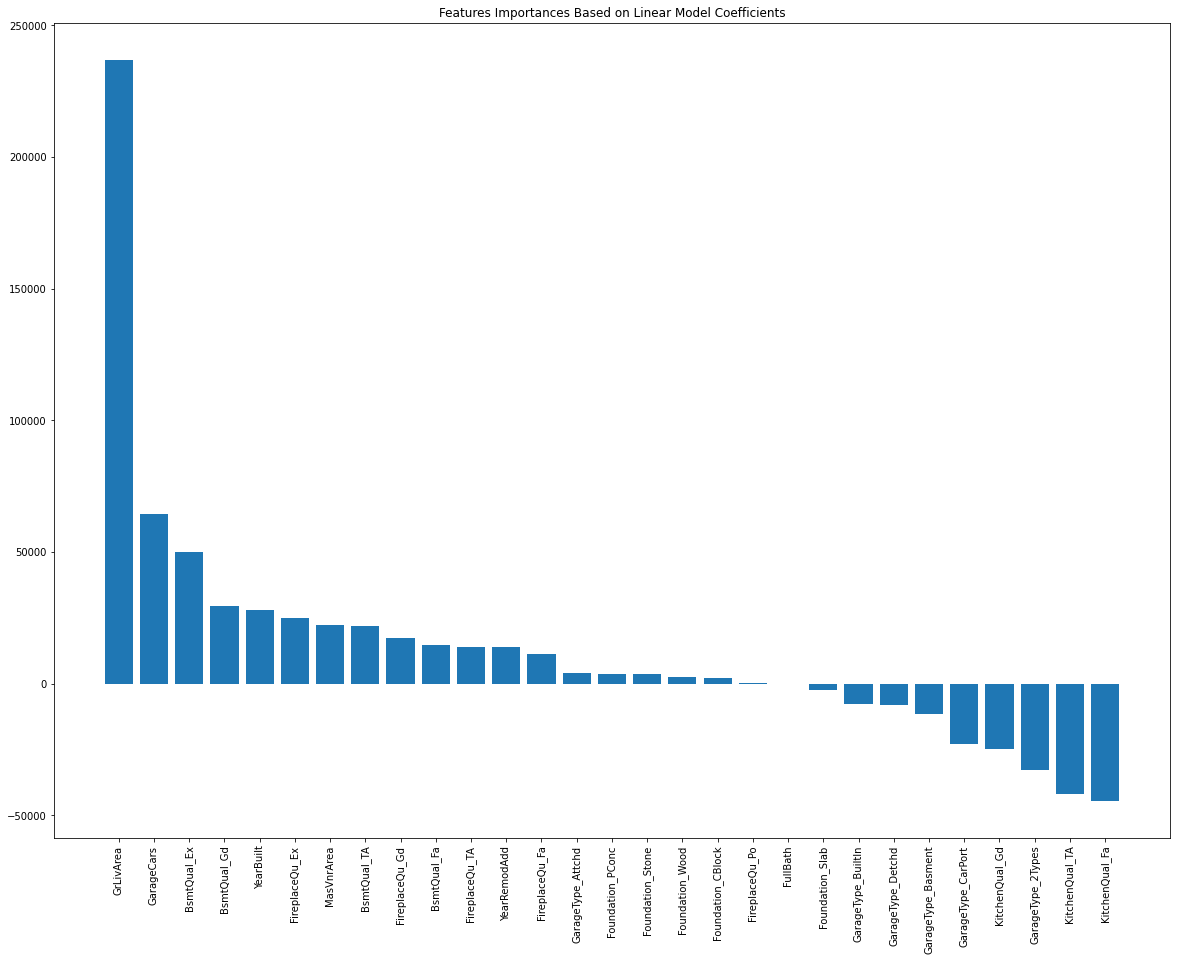

In [ ]:
importances = pd.DataFrame(data={'Attribute': df_train_features.columns, 'Importance': mul_lin_reg.coef_})
importances = importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize = (20,15))
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Features Importances Based on Linear Model Coefficients')
plt.xticks(rotation='vertical')
plt.show()

Shows how each feature add/reduces value of a home.

### Ridge Regrssion

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(x2, y)


Ridge(alpha=1, solver='cholesky')

### Lasso Model

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x2, y)

Lasso(alpha=0.1)

### Elastic Net Model

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x2, y)

ElasticNet(alpha=0.1)

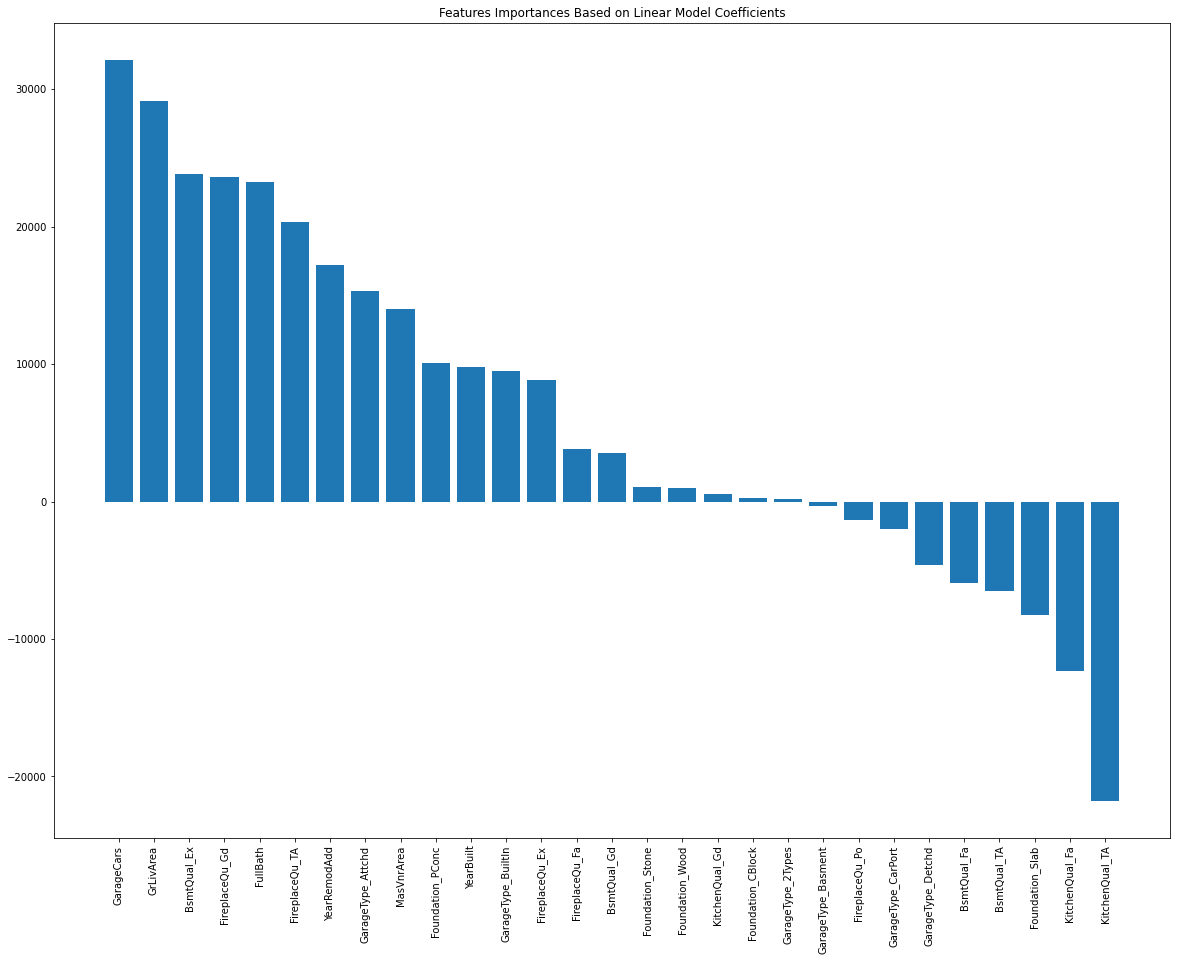

In [ ]:
importances = pd.DataFrame(data={'Attribute': df_train_features.columns, 'Importance': elastic_net.coef_})
importances = importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize = (20,15))
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Features Importances Based on Linear Model Coefficients')
plt.xticks(rotation='vertical')
plt.show()

Here there are a decent amount of strong predictors but still showing a few negative features. These are some of the dummy features we created. 

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
def display_scores(scores):
     print("Scores:", scores)
     print("Mean:", scores.mean())
     print("Standard deviation:", scores.std())

In [ ]:
# single variable linear regression scores
lin_scores = cross_val_score(lin_reg, x, y,
                              scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [35710.91013047 38533.01599977 40764.05074441 39723.88160059
 41068.80563347 32707.32082215 31848.44152987 36779.49122965
 37964.38172998 36569.79045718]
Mean: 37167.00898775352
Standard deviation: 2966.5661070603524


In [ ]:
# multiple linear regression
ml_scores = cross_val_score(lin_reg, x2, y,
                              scoring="neg_mean_squared_error", cv=10)

ml_rmse_scores = np.sqrt(-ml_scores)
display_scores(ml_rmse_scores)

Scores: [24365.16991387 27450.74117252 25647.72547594 37251.7503795
 30186.08261484 22131.79506353 25288.16903016 26568.19829563
 39151.99034948 27781.61369587]
Mean: 28582.32359913438
Standard deviation: 5237.214897559827


In [ ]:
# ridge regression
rig_scores = cross_val_score(ridge_reg, x2, y,
                              scoring="neg_mean_squared_error", cv=10)

rig_rmse_scores = np.sqrt(-rig_scores)
display_scores(rig_rmse_scores)

Scores: [24404.78810839 27701.82866289 26347.34499148 36697.09752942
 30622.35886032 22636.65613795 25859.30101512 26924.86622093
 36685.48076859 28384.41939663]
Mean: 28626.414169171425
Standard deviation: 4521.364442372757


In [ ]:
from sklearn.metrics import mean_squared_error
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]
for a in alphas:
    model = Ridge(alpha=a).fit(x2,y)   
    score = model.score(x2, y)
    pred_y = model.predict(x2)
    mse = mean_squared_error(y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.79, MSE:782559615.11, RMSE:27974.27
Alpha:0.0010, R2:0.79, MSE:782559623.59, RMSE:27974.27
Alpha:0.0100, R2:0.79, MSE:782560468.13, RMSE:27974.28
Alpha:0.1000, R2:0.79, MSE:782641486.27, RMSE:27975.73
Alpha:0.3000, R2:0.78, MSE:783234532.05, RMSE:27986.33
Alpha:0.5000, R2:0.78, MSE:784284756.77, RMSE:28005.08
Alpha:0.7000, R2:0.78, MSE:785683904.71, RMSE:28030.05
Alpha:1.0000, R2:0.78, MSE:788261934.30, RMSE:28076.00


In [ ]:
# lasso regression
las_scores = cross_val_score(lasso_reg, x2, y,
                              scoring="neg_mean_squared_error", cv=10)

las_rmse_scores = np.sqrt(-las_scores)
display_scores(las_rmse_scores)

Scores: [24363.90422372 27450.53469403 25647.58170167 37250.5440129
 30186.88580283 22131.7280584  25288.9796345  26568.11776351
 39148.84625525 27780.8385426 ]
Mean: 28581.79606894229
Standard deviation: 5236.491976194531


In [ ]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]
for a in alphas:
    model = Lasso(alpha=a).fit(x2,y)   
    score = model.score(x2, y)
    pred_y = model.predict(x2)
    mse = mean_squared_error(y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.79, MSE:782559615.02, RMSE:27974.27
Alpha:0.0010, R2:0.79, MSE:782559615.03, RMSE:27974.27
Alpha:0.0100, R2:0.79, MSE:782559615.45, RMSE:27974.27
Alpha:0.1000, R2:0.79, MSE:782559657.48, RMSE:27974.27
Alpha:0.3000, R2:0.79, MSE:782559997.10, RMSE:27974.27
Alpha:0.5000, R2:0.79, MSE:782560669.38, RMSE:27974.29
Alpha:0.7000, R2:0.79, MSE:782561632.94, RMSE:27974.30
Alpha:1.0000, R2:0.79, MSE:782563680.74, RMSE:27974.34


In [ ]:
# elastic net
enet_scores = cross_val_score(elastic_net, x2, y,
                              scoring="neg_mean_squared_error", cv=10)

enet_rmse_scores = np.sqrt(-enet_scores)
display_scores(enet_rmse_scores)

Scores: [30198.56336538 33821.07953353 35343.06789605 38013.31883407
 38880.5050864  30417.81283234 32506.70521269 34098.84957064
 33605.6779795  35717.566262  ]
Mean: 34260.314657259965
Standard deviation: 2715.00413134062


In [ ]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss='log', penalty='elasticnet', alpha=1, l1_ratio=.1)

model.fit(x2, y)
# Accuracry on training data
print('Training Accuracy:', model.score(x2, y))

Training Accuracy: 0.009246088193456615


In [ ]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]
for a in alphas:
    model = ElasticNet(alpha=a).fit(x2,y)   
    score = model.score(x2, y)
    pred_y = model.predict(x2)
    mse = mean_squared_error(y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.79, MSE:782600625.41, RMSE:27975.00
Alpha:0.0010, R2:0.78, MSE:785707138.99, RMSE:28030.47
Alpha:0.0100, R2:0.77, MSE:854726646.47, RMSE:29235.71
Alpha:0.1000, R2:0.68, MSE:1158096271.59, RMSE:34030.81
Alpha:0.3000, R2:0.60, MSE:1438894878.28, RMSE:37932.77
Alpha:0.5000, R2:0.56, MSE:1602038250.38, RMSE:40025.47
Alpha:0.7000, R2:0.53, MSE:1723059778.01, RMSE:41509.76
Alpha:1.0000, R2:0.49, MSE:1866849902.05, RMSE:43207.06


Comparing performance across different models selected. With the added features, the average standard deviation is going down but the average mean is going up suggesting that there needs to be further feature analysis to find better predictors. 

## Generate Submission

In [ ]:
test_preds = elastic.predict(df_test_features)

In [ ]:
#output = pd.DataFrame({'Id': df_test.Id,
#                       'SalePrice': test_preds})
#output.to_csv('submission5.csv', index=False)

In [ ]:
#from google.colab import files
#files.download('submission5.csv')

## Conclusions

From the above larger feature selection, the predictions were worse over all models than the below features. I found that going back to my original feature selection (shown below) with the lasso gave me the best predictions out of all the options I tried. The lasso only gave me a slight improvement over the multiple linear regression with the below features. This could indicate that I need to take additional features into consideration or this dataset requires a model that is something other than regression. 

In [ ]:
num = df_train2[['OverallQual','TotalBath','GrLivArea']]

In [ ]:
num[['OverallQual','TotalBath','GrLivArea']]=scaler.fit_transform(num[['OverallQual','TotalBath','GrLivArea']])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
dummies = pd.get_dummies(df_train2_cat[['Neighborhood','ExterQual','KitchenQual']], drop_first=True)

In [ ]:
simple_features= pd.concat([num, dummies], axis = 1)

In [ ]:
x3 = simple_features

In [ ]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x3, y)

Lasso(alpha=0.1)

In [ ]:
las_scores = cross_val_score(lasso_reg, x3, y,
                              scoring="neg_mean_squared_error", cv=10)

las_rmse_scores = np.sqrt(-las_scores)
display_scores(las_rmse_scores)

Scores: [23456.15036255 25130.19998363 25502.01216726 30893.51838842
 29540.68336715 21190.01890588 24408.08675546 23340.90260935
 33771.10400598 27604.51341126]
Mean: 26483.718995694227
Standard deviation: 3705.7288187321255


In [ ]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]
for a in alphas:
    model = Lasso(alpha=a).fit(x3,y)   
    score = model.score(x3, y)
    pred_y = model.predict(x3)
    mse = mean_squared_error(y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.82, MSE:663135069.44, RMSE:25751.41
Alpha:0.0010, R2:0.82, MSE:663135069.44, RMSE:25751.41
Alpha:0.0100, R2:0.82, MSE:663135069.74, RMSE:25751.41
Alpha:0.1000, R2:0.82, MSE:663135099.60, RMSE:25751.41
Alpha:0.3000, R2:0.82, MSE:663135340.95, RMSE:25751.41
Alpha:0.5000, R2:0.82, MSE:663135823.43, RMSE:25751.42
Alpha:0.7000, R2:0.82, MSE:663136546.92, RMSE:25751.44
Alpha:1.0000, R2:0.82, MSE:663138084.26, RMSE:25751.47
